## problem statement

## **IMPORTING NECESSARY LIBRARIES**

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [181]:
df = pd.read_csv("weather_classification_data.csv")

In [182]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


##  EDA FEATURES ( Exploratory Data Analysis)

In [185]:
df.shape

(13200, 11)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [191]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [193]:
df.duplicated().sum()

0

In [195]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


## SEPARATE THE  NEMERICAL & CATEGORICAL COLUMNS 

In [17]:
num_col = df.select_dtypes(['int64','float64'])
cat_col = df.select_dtypes('object')

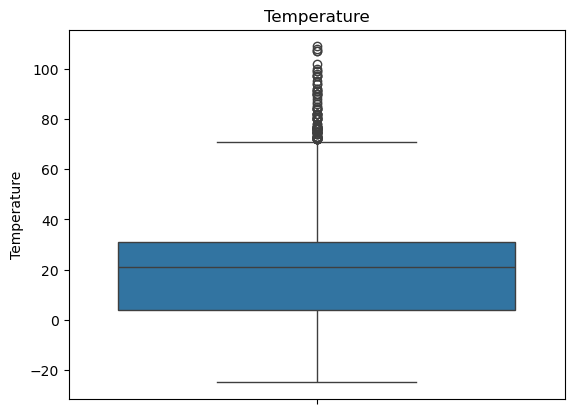

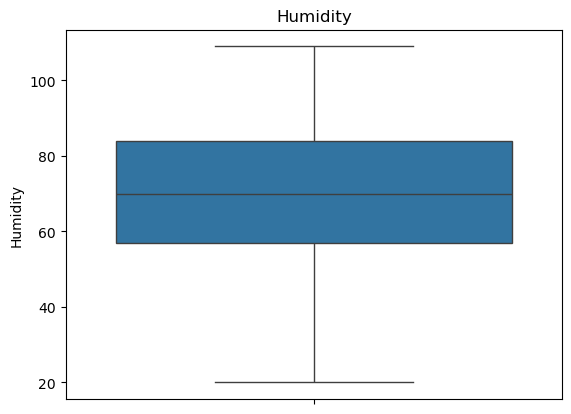

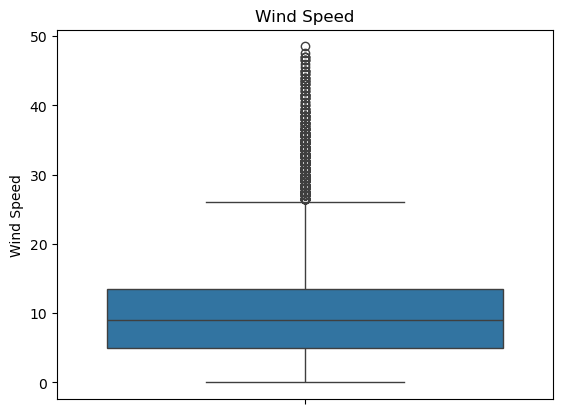

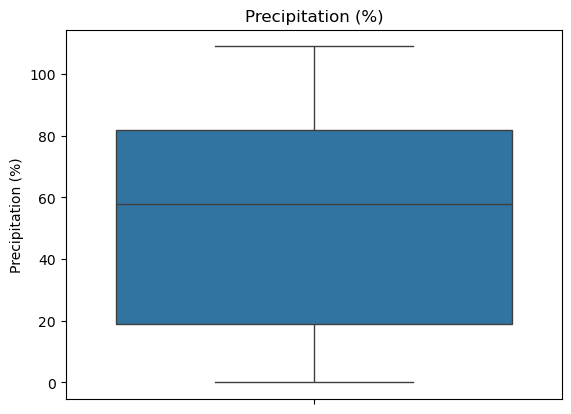

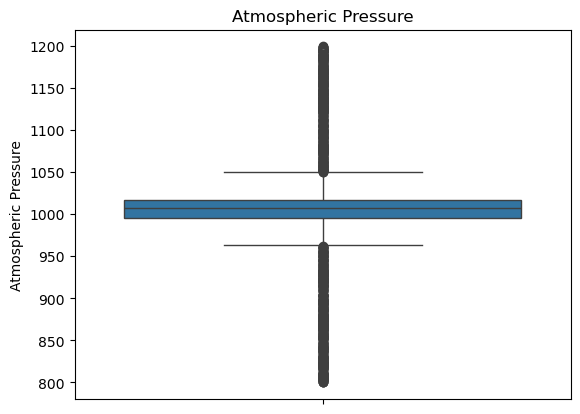

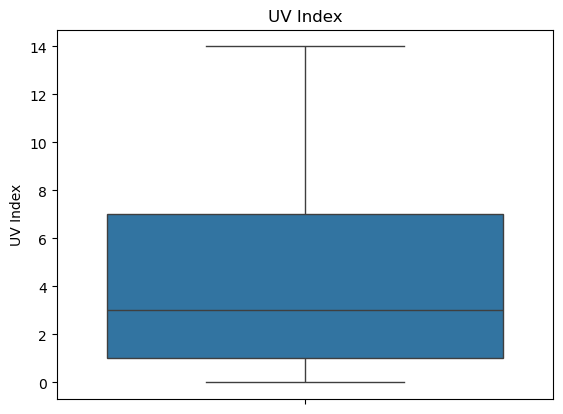

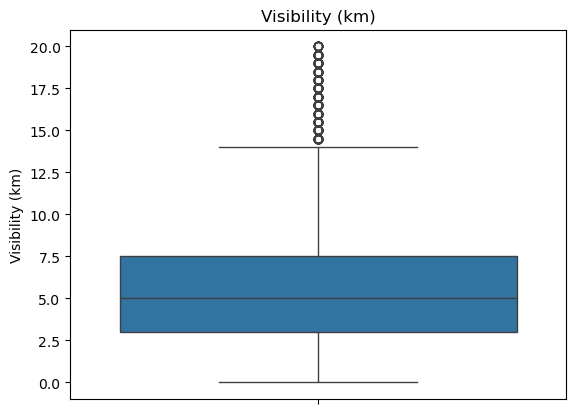

In [18]:
for col in num_col:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [19]:
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1
IQR

27.0

In [20]:
lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR
print(lower_tail, upper_tail)

-36.5 71.5


In [21]:
def outlier(value):
    if value < lower_tail:
        return lower_tail
    elif value > upper_tail:
        return upper_tail
    else:
        return value

In [22]:
df['Temperature'] = df['Temperature'].apply(outlier)

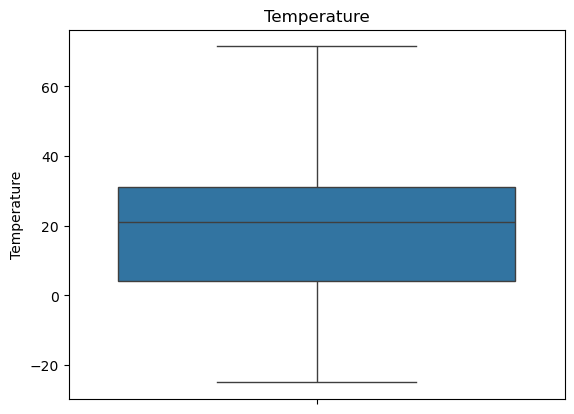

In [23]:
sns.boxplot(df['Temperature'])
plt.title('Temperature')
plt.show()

In [24]:
Q1 = df['Wind Speed'].quantile(0.25)
Q3 = df['Wind Speed'].quantile(0.75)
IQR = Q3 - Q1
IQR

8.5

In [25]:
lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR
print(lower_tail, upper_tail)

-7.75 26.25


# replacing the outliers

In [26]:
def outlier(value):
    if value < lower_tail:
        return lower_tail
    elif value > upper_tail:
        return upper_tail
    else:
        return value

In [27]:
df['Wind Speed'] = df['Wind Speed'].apply(outlier)

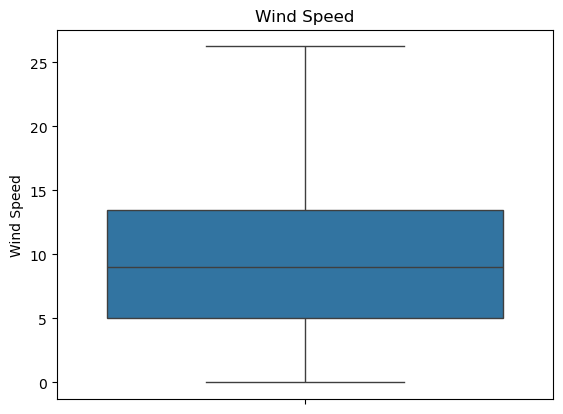

In [28]:
sns.boxplot(df['Wind Speed'])
plt.title('Wind Speed')
plt.show()

In [29]:
Q1 = df['Atmospheric Pressure'].quantile(0.25)
Q3 = df['Atmospheric Pressure'].quantile(0.75)
IQR = Q3 - Q1
IQR

21.972500000000082

In [30]:
lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR
print(lower_tail, upper_tail)

961.8412499999998 1049.7312500000003


In [31]:
def outlier(value):
    if value < lower_tail:
        return lower_tail
    elif value > upper_tail:
        return upper_tail
    else:
        return value

In [32]:
df['Atmospheric Pressure'] = df['Atmospheric Pressure'].apply(outlier)

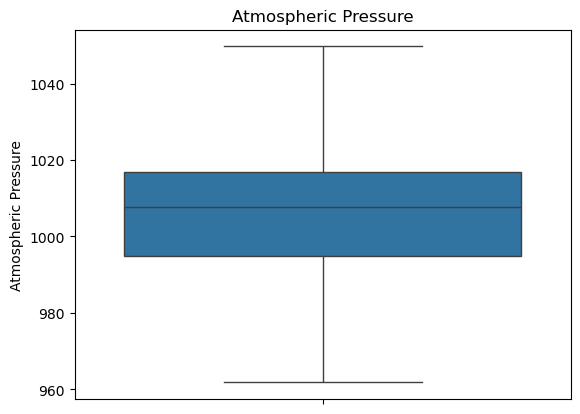

In [33]:
sns.boxplot(df['Atmospheric Pressure'])
plt.title('Atmospheric Pressure')
plt.show()

In [34]:
Q1 = df['Visibility (km)'].quantile(0.25)
Q3 = df['Visibility (km)'].quantile(0.75)
IQR = Q3 - Q1
IQR

4.5

In [35]:
lower_tail = Q1 - 1.5 * IQR
upper_tail = Q3 + 1.5 * IQR
print(lower_tail, upper_tail) 

-3.75 14.25


In [36]:
def outlier(value):
    if value < lower_tail:
        return lower_tail
    elif value > upper_tail:
        return upper_tail
    else:
        return value

In [37]:
df['Visibility (km)'] = df['Visibility (km)'].apply(outlier)

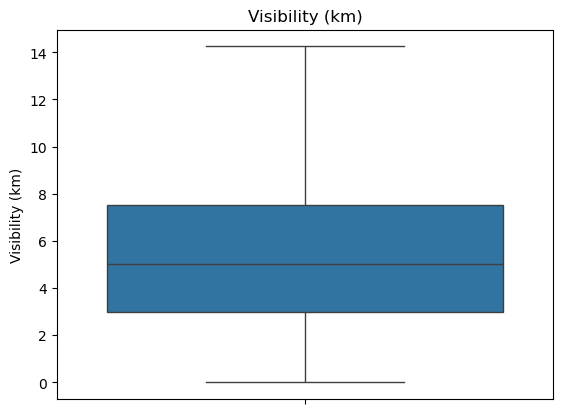

In [38]:
sns.boxplot(df['Visibility (km)'])
plt.title('Visibility (km)')
plt.show()

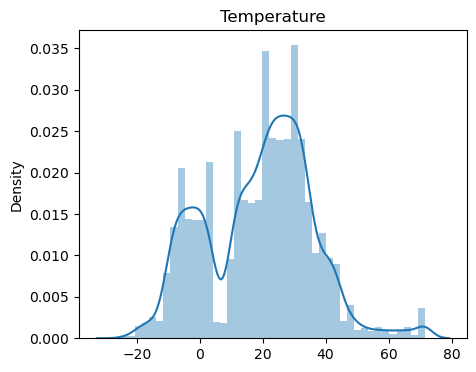

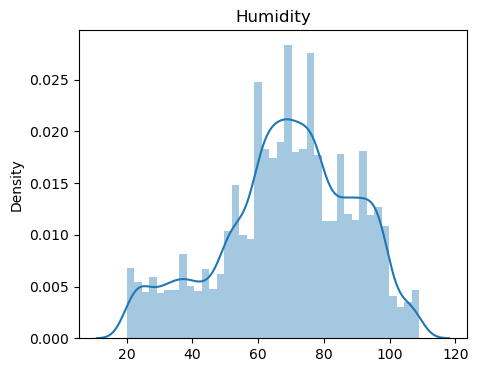

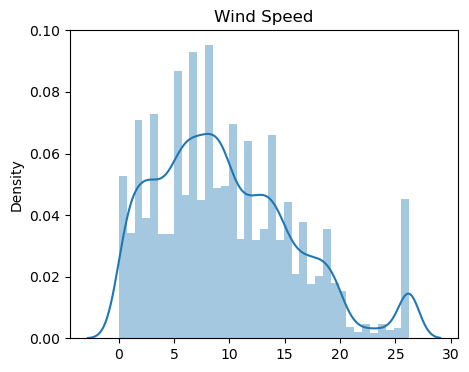

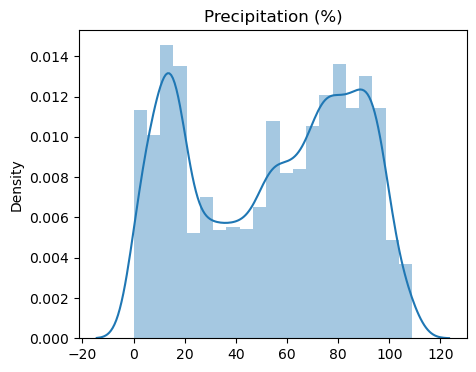

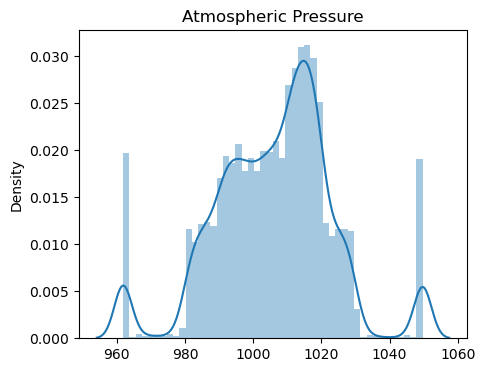

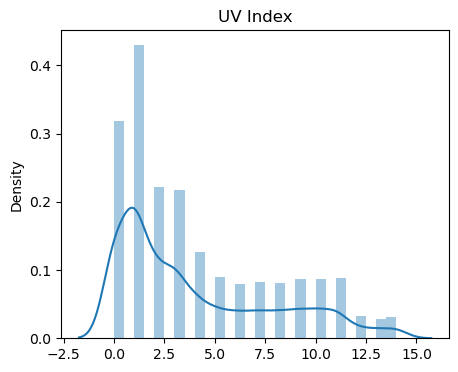

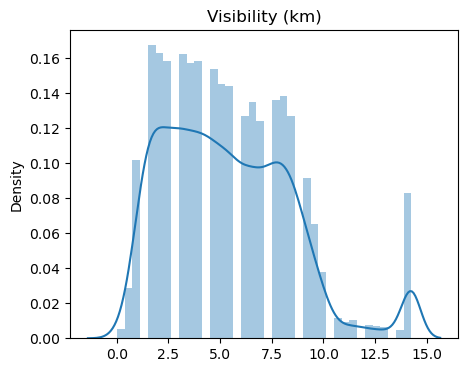

In [39]:
for col in num_col:
    plt.figure(figsize=(5,4))
    sns.distplot(df[[col]])
    plt.title(col)
    plt.show()

In [40]:
num_col

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
0,14.0,73,9.5,82.0,1010.82,2,3.5
1,39.0,96,8.5,71.0,1011.43,7,10.0
2,30.0,64,7.0,16.0,1018.72,5,5.5
3,38.0,83,1.5,82.0,1026.25,7,1.0
4,27.0,74,17.0,66.0,990.67,1,2.5
...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,1003.15,1,1.0
13196,-1.0,76,3.5,23.0,1067.23,1,6.0
13197,30.0,77,5.5,28.0,1012.69,3,9.0
13198,3.0,76,10.0,94.0,984.27,0,2.0


In [41]:
cat_col

,Cloud Cover,Season,Location,Weather Type
0,partly cloudy,Winter,inland,Rainy
1,partly cloudy,Spring,inland,Cloudy
2,clear,Spring,mountain,Sunny
3,clear,Spring,coastal,Sunny
4,overcast,Winter,mountain,Rainy
...,...,...,...,...
13195,overcast,Summer,mountain,Rainy
13196,cloudy,Winter,coastal,Snowy
13197,overcast,Autumn,coastal,Cloudy
13198,overcast,Winter,inland,Snowy


In [42]:
for col in cat_col:
    print(col,":",df[col].unique())

Cloud Cover : ['partly cloudy' 'clear' 'overcast' 'cloudy']
Season : ['Winter' 'Spring' 'Summer' 'Autumn']
Location : ['inland' 'mountain' 'coastal']
Weather Type : ['Rainy' 'Cloudy' 'Sunny' 'Snowy']


## **LABEL ENCODING**

In [44]:
from sklearn.preprocessing import LabelEncoder
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [45]:
# df['Location'] = df['Location'].map({'inland':0, 'mountain':1, 'coastal':2})
# df['Cloud Cover'] = df['Cloud Cover'].map({'partly cloudy':0, 'clear':1, 'overcast':2, 'cloudy':3})
# df['Season'] = df['Season'].map({'Winter':0, 'Spring':1, 'Summer':2, 'Autumn':3 })
# df['Weather Type'] = df['Weather Type'].map({'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3})

In [175]:
df.head(5) 

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.404145,0.595506,0.361905,0.752294,3,0.557273,0.142857,3,0.245614,1,1
1,0.663212,0.853933,0.323810,0.651376,3,0.564214,0.500000,1,0.701754,1,0
2,0.569948,0.494382,0.266667,0.146789,0,0.647158,0.357143,1,0.385965,2,3
3,0.652850,0.707865,0.057143,0.752294,0,0.732834,0.500000,1,0.070175,0,3
4,0.538860,0.606742,0.647619,0.605505,2,0.328009,0.071429,3,0.175439,2,1


In [173]:
df.tail(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,0.362694,0.606742,0.552381,0.651376,2,0.470005,0.071429,2,0.070175,2,1
13196,0.248705,0.629213,0.133333,0.211009,1,1.000000,0.071429,3,0.421053,0,2
13197,0.569948,0.640449,0.209524,0.256881,2,0.578550,0.214286,0,0.631579,0,0
13198,0.290155,0.629213,0.380952,0.862385,2,0.255191,0.000000,3,0.140351,1,2
13199,0.207254,0.202247,0.000000,0.844037,2,0.609043,0.357143,0,0.701754,2,1


In [48]:
X = df.drop('Weather Type',axis=1)
Y = df['Weather Type']

In [49]:
from sklearn.preprocessing import MinMaxScaler

In [50]:
for col in num_col:
    ms = MinMaxScaler()
    df[col] = ms.fit_transform(df[[col]])

In [51]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,0.404145,0.595506,0.361905,0.752294,3,0.557273,0.142857,3,0.245614,1,1
1,0.663212,0.853933,0.323810,0.651376,3,0.564214,0.500000,1,0.701754,1,0
2,0.569948,0.494382,0.266667,0.146789,0,0.647158,0.357143,1,0.385965,2,3
3,0.652850,0.707865,0.057143,0.752294,0,0.732834,0.500000,1,0.070175,0,3
4,0.538860,0.606742,0.647619,0.605505,2,0.328009,0.071429,3,0.175439,2,1
...,...,...,...,...,...,...,...,...,...,...,...
13195,0.362694,0.606742,0.552381,0.651376,2,0.470005,0.071429,2,0.070175,2,1
13196,0.248705,0.629213,0.133333,0.211009,1,1.000000,0.071429,3,0.421053,0,2
13197,0.569948,0.640449,0.209524,0.256881,2,0.578550,0.214286,0,0.631579,0,0
13198,0.290155,0.629213,0.380952,0.862385,2,0.255191,0.000000,3,0.140351,1,2


In [52]:
from sklearn.model_selection import train_test_split

In [53]:
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.20, random_state=42)

In [59]:

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBRFClassifier
from sklearn.neighbors import KNeighborsClassifier

In [61]:

random_model = RandomForestClassifier()
adaboost_model = AdaBoostClassifier()
gradient_model = GradientBoostingClassifier()
xgboost_model = XGBRFClassifier()
knn_model = KNeighborsClassifier()

In [64]:
random_model.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
adaboost_model.fit(x_train, y_train)

AdaBoostClassifier()

In [66]:
gradient_model.fit(x_train, y_train)

GradientBoostingClassifier()

In [67]:
xgboost_model.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='multi:softprob',
                random_state=None, reg_alpha=None, ...)

In [69]:
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred_ran = random_model.predict(x_test)

In [73]:
y_pred_ada = adaboost_model.predict(x_test)

In [74]:
y_pred_gra = gradient_model.predict(x_test)

In [75]:
y_pred_xg = xgboost_model.predict(x_test)

In [77]:
y_pred_knn = knn_model.predict(x_test)

Random score

In [93]:
random_model.score(x_train, y_train)

1.0

In [94]:
random_model.score(x_test,y_test)

0.9170454545454545

Adaboost score

In [98]:
adaboost_model.score(x_train, y_train)

0.8741477272727273

In [99]:
adaboost_model.score(x_test, y_test)

0.865909090909091

Gradient Score

In [101]:
gradient_model.score(x_train, y_train)

0.9458333333333333

In [102]:
gradient_model.score(x_test, y_test)

0.9102272727272728

XGBoost Score 

In [106]:
xgboost_model.score(x_train, y_train)

0.9582386363636364

In [108]:
xgboost_model.score(x_test, y_test)

0.9128787878787878

KNN Score

In [111]:
knn_model.score(x_train, y_train)

0.9245265151515152

In [112]:
knn_model.score(x_test, y_test)

0.884090909090909

In [113]:
import pickle 

In [114]:
with open('weather.pkl','wb') as file:
    pickle.dump(xgboost_model,file)

In [169]:
#W=[[39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1]]
#W=[[14.0,73,9.5,82.0,1,1010.82,2,3,3.5,1]]
#W = [[30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2]]
#W = [[-7.0,97,0.5,99.0,2,983.91000,0,3,3.0,2]]	
prediction = xgboost_model.predict(W)
if prediction == 0:
    print("Cloudy")
elif prediction == 1:
    print("Rainy")
elif prediction == 3:
    print("Sunny")
else:
    print("Snowy")

Sunny


# Conclusion

 To predict the accurate weather based on various atmospheric data is essential for numerous applications, , xgboosting algorithm (train-0.95,test-0.91)gives the best accuricy as compare to rest one , also it  predicted 'W' accurately.
